In [1]:
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\ebadu\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_uk_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

In [5]:
df_UK = df[df['job_country'] == 'United Kingdom'].copy()
df_UK['job_posted_month'] = df_UK['job_posted_date'].dt.strftime('%B')
df_UK_pivot = df_UK.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_UK_pivot.reset_index(inplace=True)
df_UK_pivot['month_no'] = pd.to_datetime(df_UK_pivot['job_posted_month'], format = '%B').dt.month
df_UK_pivot.sort_values('month_no', inplace=True)
df_UK_pivot.set_index('job_posted_month', inplace=True)
df_UK_pivot.drop(columns='month_no', inplace=True)

In [7]:
df_uk_merge = df_UK_pivot.merge(df_uk_software_pivot, on='job_posted_month')

In [9]:
top_5 = (df_uk_merge.sum().sort_values(ascending=False).head().index.to_list())


Index(['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer',
       'UI/UX Designer', 'Data Engineer'],
      dtype='object')

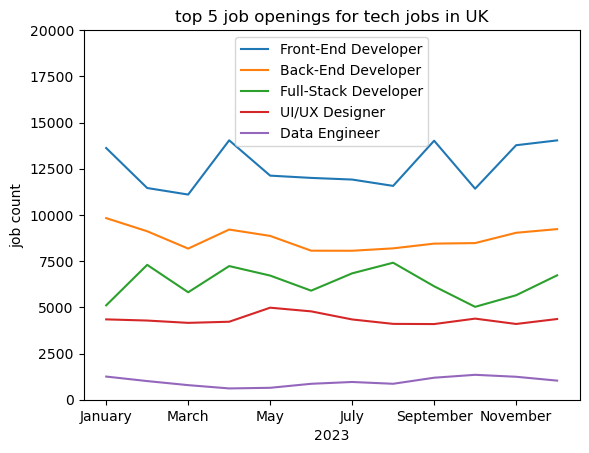

In [12]:
df_uk_merge[top_5].plot(kind='line')
plt.title('top 5 job openings for tech jobs in UK')
plt.xlabel('2023')
plt.ylabel('job count')
plt.ylim(0,20000)
plt.legend()
plt.show()